<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/project/final_project_svc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physical Activity Monitoring


In [ ]:
#load libraries

import numpy as np
import pandas as pd
import seaborn as sns

from pandas.plotting import scatter_matrix

from imblearn.over_sampling   import SMOTE
from imblearn.under_sampling  import RandomUnderSampler

from matplotlib import pyplot as plt

from joblib import dump, load

from sklearn.preprocessing    import MinMaxScaler
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing    import StandardScaler
from sklearn                  import metrics
from sklearn.decomposition    import PCA
from sklearn.linear_model     import LogisticRegression
from sklearn.naive_bayes      import GaussianNB
from sklearn.ensemble         import RandomForestClassifier
from sklearn.svm              import SVC
from sklearn.metrics          import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#load preprocessed data
data_path = '/content/drive/My Drive/final_project/preprocessed_15.csv'

raw_data = pd.DataFrame(pd.read_csv(data_path))

In [ ]:
data = raw_data
data.head()

,heartrate,hand_temperature,hand_Acc16_1,hand_Acc16_2,hand_Acc16_3,hand_Gyro1,hand_Gyro2,hand_Gyro3,hand_Magne1,hand_Magne2,...,ankle_Acc16_1,ankle_Acc16_2,ankle_Acc16_3,ankle_Gyro1,ankle_Gyro2,ankle_Gyro3,ankle_Magne1,ankle_Magne2,ankle_Magne3,activity_id
0,0.103448,0.921875,0.545767,0.558313,0.552159,0.513015,0.441780,0.498665,0.388548,0.668452,...,0.495432,0.471040,0.486238,0.579315,0.570432,0.459166,0.598851,0.714324,0.389601,1
1,0.117241,0.664062,0.586456,0.500008,0.565538,0.512737,0.441200,0.497938,0.499793,0.669392,...,0.504800,0.470115,0.503702,0.579566,0.570602,0.459349,0.572424,0.665803,0.361846,1
2,0.206897,0.453125,0.598482,0.508803,0.556485,0.512685,0.441971,0.497963,0.461029,0.657385,...,0.498404,0.469080,0.502309,0.579900,0.571544,0.460210,0.593281,0.679061,0.379865,1
3,0.234483,0.437500,0.522582,0.539130,0.565512,0.511076,0.444953,0.501005,0.375742,0.571248,...,0.528230,0.503089,0.495722,0.570374,0.569652,0.462040,0.491398,0.605148,0.643054,1
4,0.165517,0.546875,0.600440,0.509517,0.553068,0.512867,0.443044,0.498676,0.418593,0.722963,...,0.496763,0.478225,0.477100,0.579329,0.571042,0.458785,0.583292,0.788440,0.418551,1


In [ ]:
distinct = set(data['activity_id'])
print(distinct)

number_of_classes = len(distinct)
print(number_of_classes)

{1, 2, 3, 4, 5, 6, 7, 10, 12, 13, 16, 17, 18, 19, 24}
15


In [ ]:
#dict for conf_matrix
activity_id_dict = {0: 'transient',
                    1: 'lying',
                    2: 'sitting',
                    3: 'standing',
                    4: 'walking',
                    5: 'running',
                    6: 'cycling',
                    7: 'Nordic_walking',
                    9: 'watching_TV',
                    10: 'computer_work',
                    11: 'car driving',
                    12: 'ascending_stairs',
                    13: 'descending_stairs',
                    16: 'vacuum_cleaning',
                    17: 'ironing',
                    18: 'folding_laundry',
                    19: 'house_cleaning',
                    20: 'playing_soccer',
                    24: 'rope_jumping' }

In [ ]:
#split 80/20 and randomize

df_train, df_val = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
# seperate x from y
y_train = df_train.pop('activity_id')
y_val   = df_val.pop('activity_id')

# convert to numpy array
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

x_train = df_train.to_numpy()
x_val = df_val.to_numpy()

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

(1975200, 31)
(1975200,)
(493800, 31)
(493800,)


In [ ]:
#PCA
k = 15 #optimal value to be found
pca = PCA(n_components=k)

pc_train = pca.fit_transform(x_train)
pc_val = pca.fit_transform(x_val)

## Classifiers

In [ ]:
#SVC
#Support Vector Classifier
# takes forever, not suitable for this large datasets --> preprocess data for use with svc

clf = SVC(kernel='rbf', C=1E2, max_iter = 300) #
#clf.fit(pc_train, y_train)
#y_pred = clf.predict(pc_val)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_val)

In [ ]:
#Logistic Regression

#clf = LogisticRegression(solver='saga', penalty="l2", max_iter=300) #try different solvers and penalties
#clf.fit(pc_train, y_train)
#y_pred = clf.predict(pc_val)

In [ ]:
#Naive Bayesianx

#clf = GaussianNB()
#clf.fit(pc_train, y_train)
#y_pred = clf.predict(pc_val)

## Evaluation

Text(0.5, 69.5815972222222, 'Predicted label')

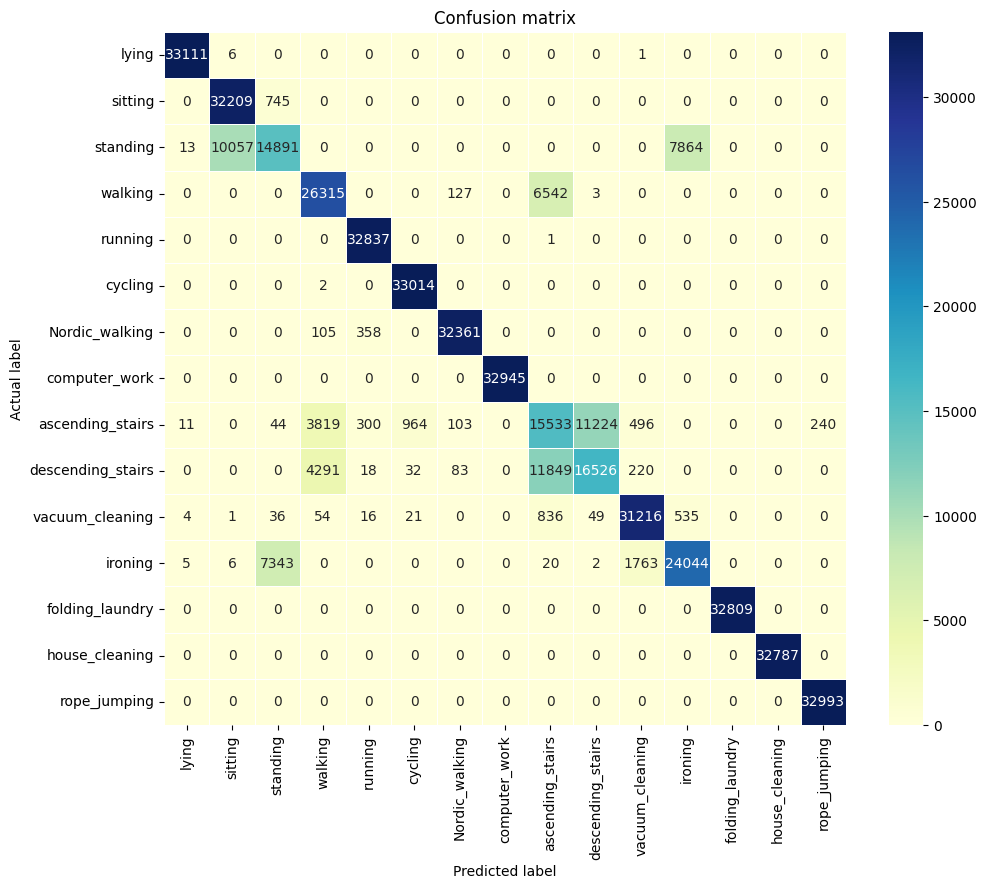

In [ ]:
#confusion matrix
cnf_matrix = confusion_matrix(y_val, y_pred)

class_labels = np.vectorize(activity_id_dict.get)(clf.classes_)

# create heatmap
fig, ax = plt.subplots(figsize=(11,9))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',linewidths=0.5,  xticklabels=class_labels, yticklabels=class_labels, ax=ax)

plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#Performance

recall = np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 1)
precision = np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 0)
f1_score = (2*recall*precision) / (recall+precision)

d = {'activity':class_labels, 'precision':precision, 'recall':recall, 'f1-score':f1_score}
performance = pd.DataFrame(data = d)
performance

,activity,precision,recall,f1-score
0,lying,0.999004,0.999789,0.999396
1,sitting,0.761820,0.977393,0.856247
2,standing,0.645778,0.453648,0.532925
3,walking,0.760857,0.797739,0.778861
4,running,0.979361,0.999970,0.989558
5,cycling,0.970115,0.999939,0.984802
6,Nordic_walking,0.990421,0.985894,0.988152
7,computer_work,1.000000,1.000000,1.000000
8,ascending_stairs,0.446594,0.474522,0.460135
9,descending_stairs,0.594375,0.500500,0.543413


In [ ]:
precision_mean = np.sum(performance['precision']) / performance.shape[0]
recall_mean = np.sum(performance['recall']) / performance.shape[0]
f1_mean = np.sum(performance['f1-score']) / performance.shape[0]

#print("Accuracy:   %.4f" % (correct_val / total_val))
print("Precsision: %.4f" % precision_mean)
print("Recall:     %.4f" % recall_mean)
print("F1-score:   %.4f" % f1_mean)


Precsision: 0.8539
Recall:     0.8578
F1-score:   0.8535


In [ ]:

#store model in file
path = '/content/drive/My Drive/final_project/models/'
model_name = 'svc_15class_nopca_rbf_300it.joblib'
model_path = path+model_name

dump(clf, model_path)


In [ ]:
'''

#load model from file
path = '/content/drive/My Drive/final_project/models/'
model_name = 'without_gyro.joblib'
model_path = path+model_name

clf = load(model_path)
y_pred = clf.predict(pc_val)

'''